# Predictive Maintenance Classification

The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

**Additional Information**

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

Dataset [link](https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip)


# Attribute Information

The dataset consists of 10 000 data points stored as rows with 14 features in columns


**UID:** unique identifier ranging from 1 to 10000.

**product ID:** consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

**air temperature [K]:** generated using a random walk process later normalized to a standard deviation of 2K around 300K.

**process temperature [K]:** generated using a random walk process normalized to a standard deviation of 1K, added to the air temperature plus 10K.

**rotational speed [rpm]:** calculated from a power of 2860W, overlaid with a normally distributed noise

**torque [Nm]:** torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

**tool wear [min]:** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.



**The machine failure consists of five independent failure modes**


**tool wear failure (TWF):** the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).


**heat dissipation failure (HDF):** heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.


**power failure (PWF):** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

**overstrain failure (OSF):** if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

**random failures (RNF):** each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.



 If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**download and unzip dataset**

In [2]:
!wget -O dataset.zip https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip
!unzip dataset.zip
!mv ai4i2020.csv data.csv

--2023-06-12 12:48:18--  https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [  <=>               ] 509.93K  1.41MB/s    in 0.4s    

2023-06-12 12:48:18 (1.41 MB/s) - ‘dataset.zip’ saved [522170]

Archive:  dataset.zip
 extracting: ai4i2020.csv            


**Loading Dataset**

In [3]:
df = pd.read_csv("data.csv")

In [4]:
# Printing Top 5 Rows of the Dataset

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
# Printing Last 5 Rows of the Dataset

df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


# Exploratory Data Analysis

In [6]:
# Printing Random 10 Rows of the Dataset

df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
4035,4036,L51215,L,302.0,310.8,1454,36.6,0,0,0,0,0,0,0
3893,3894,L51073,L,302.3,311.2,1549,40.6,66,0,0,0,0,0,0
4007,4008,L51187,L,302.1,311.2,1369,50.8,164,0,0,0,0,0,0
2862,2863,L50042,L,300.6,309.5,1867,23.0,242,0,0,0,0,0,0
2176,2177,M17036,M,299.6,309.3,1387,48.3,25,0,0,0,0,0,0
1115,1116,M15975,M,296.4,307.3,2077,19.1,80,0,0,0,0,0,0
3815,3816,L50995,L,302.2,310.7,1769,24.9,91,0,0,0,0,0,0
8239,8240,L55419,L,299.0,310.4,1339,49.6,94,0,0,0,0,0,0
6376,6377,L53556,L,300.0,309.6,1694,28.7,94,0,0,0,0,0,0
5350,5351,M20210,M,303.4,312.8,1622,35.1,107,0,0,0,0,0,0


In [7]:
# Printing Total Number of Rows and Columns 

print("Total Number of Rows    : ", df.shape[0])
print("Total Number of Columns : ", df.shape[1])

Total Number of Rows    :  10000
Total Number of Columns :  14


In [8]:
# Printing Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [9]:
# Printing Null Values

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
# Printing Duplicated Values

df.duplicated().sum()

0

In [11]:
# Printing Columns name

df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [12]:
# Dropping unwanted columns

df.drop(columns=['UDI', 'Product ID'], inplace=True)

In [13]:
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


# Univariant Analysis

**Type Column**

In [14]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

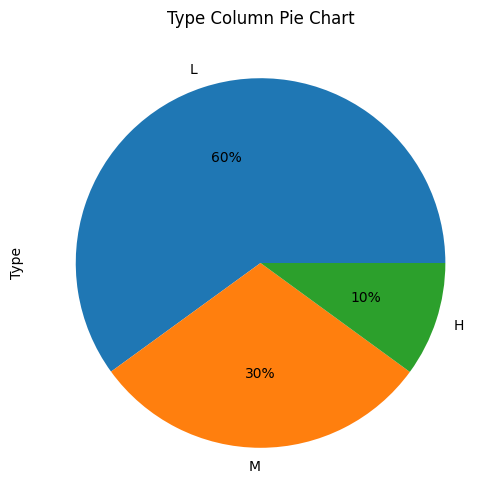

In [15]:
df.Type.value_counts().plot(kind='pie', title='Type Column Pie Chart', figsize=(9,6), autopct='%1.0f%%')
plt.show()

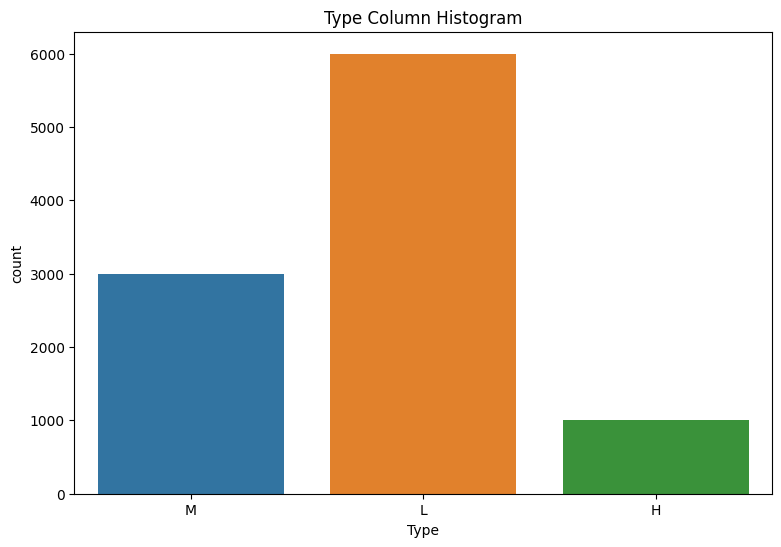

In [16]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.Type)
plt.title("Type Column Histogram")
plt.show()

**Air temperature Column**

In [17]:
df['Air temperature [K]'].value_counts()

300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
        ... 
304.4      7
296.0      6
295.4      3
295.3      3
304.5      1
Name: Air temperature [K], Length: 93, dtype: int64

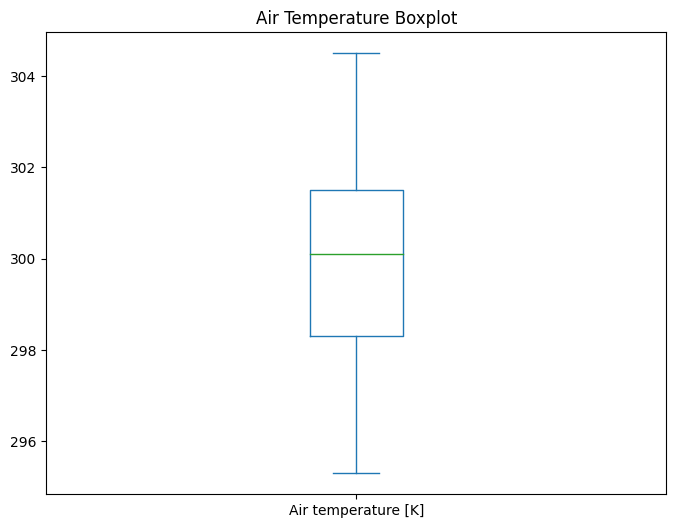

In [18]:
df['Air temperature [K]'].plot(kind='box', figsize=(8,6), title=("Air Temperature Boxplot"))
plt.show()

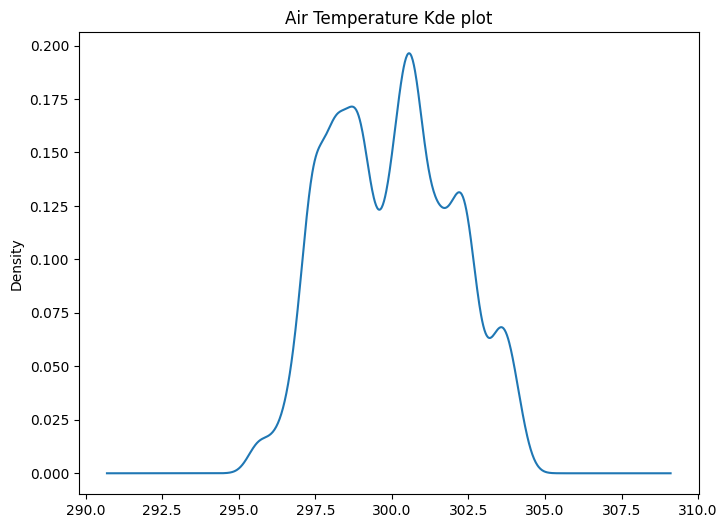

In [19]:
df['Air temperature [K]'].plot(kind='kde', figsize=(8,6), title=("Air Temperature Kde plot"))
plt.show()

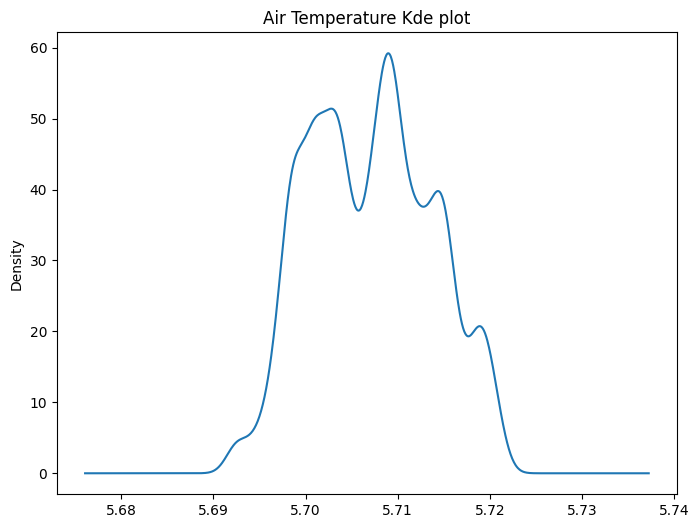

In [20]:
# Applying log transformation

np.log1p(df['Air temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Air Temperature Kde plot"))
plt.show()

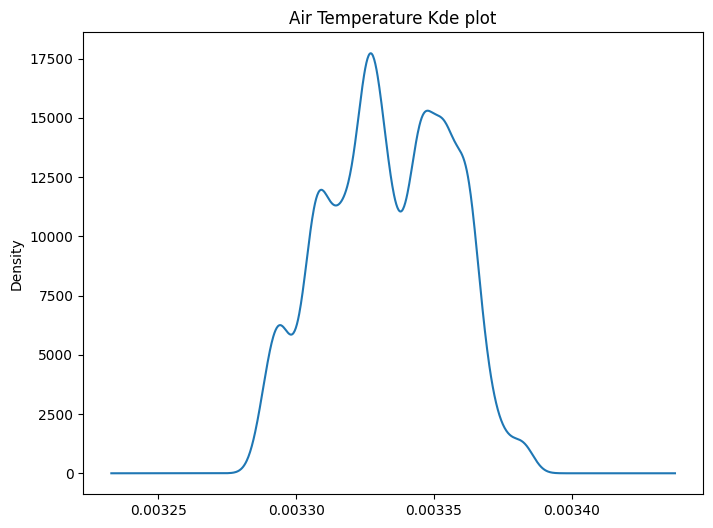

In [21]:
# Applying Reciprocal transformation

np.reciprocal(df['Air temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Air Temperature Kde plot"))
plt.show()

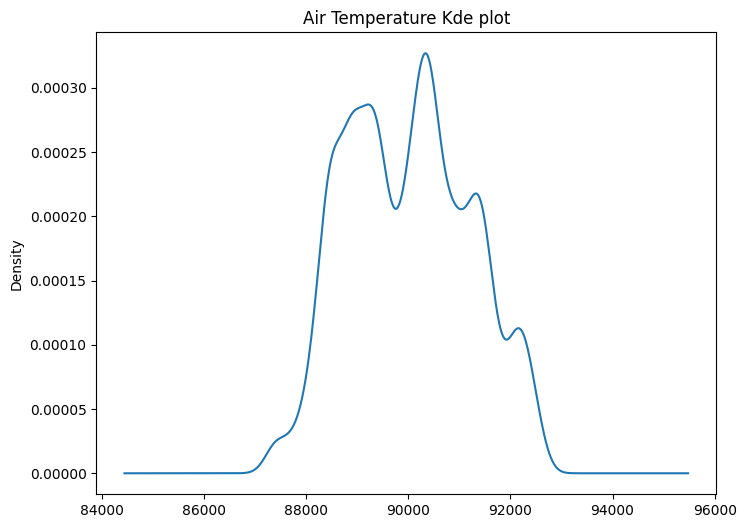

In [22]:
# Applying Square root transformation

np.square(df['Air temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Air Temperature Kde plot"))
plt.show()

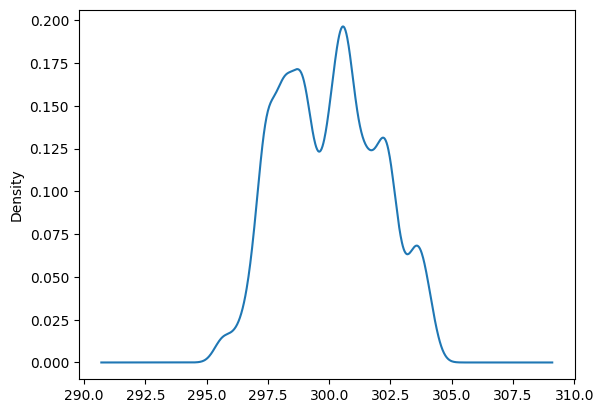

In [23]:
power = 1

# apply the power transformation
transformed_data = np.power(df['Air temperature [K]'], power)
transformed_data.plot(kind='kde')
plt.show()

**Process temperature [K] Column**

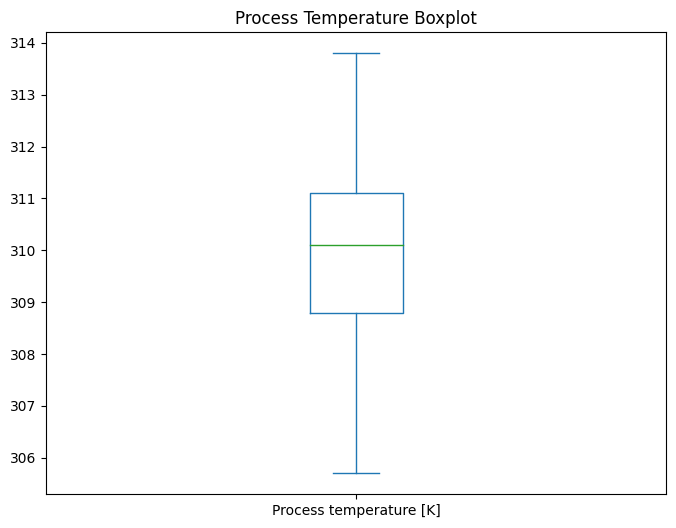

In [24]:
df['Process temperature [K]'].plot(kind='box', figsize=(8,6), title=("Process Temperature Boxplot"))
plt.show()

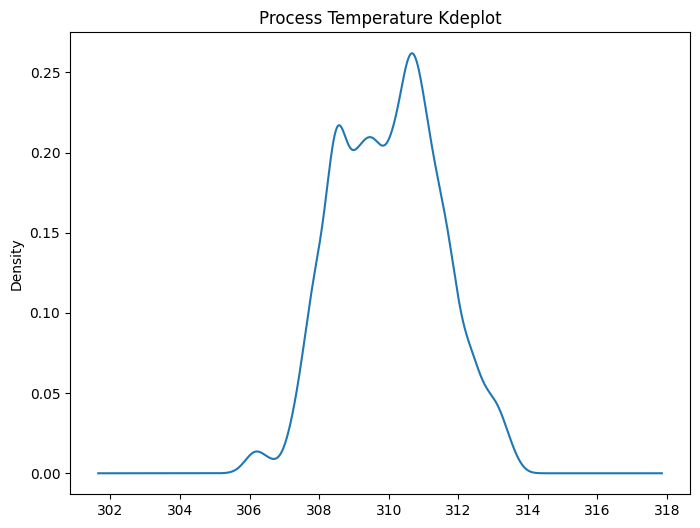

In [25]:
df['Process temperature [K]'].plot(kind='kde', figsize=(8,6), title=("Process Temperature Kdeplot"))
plt.show()

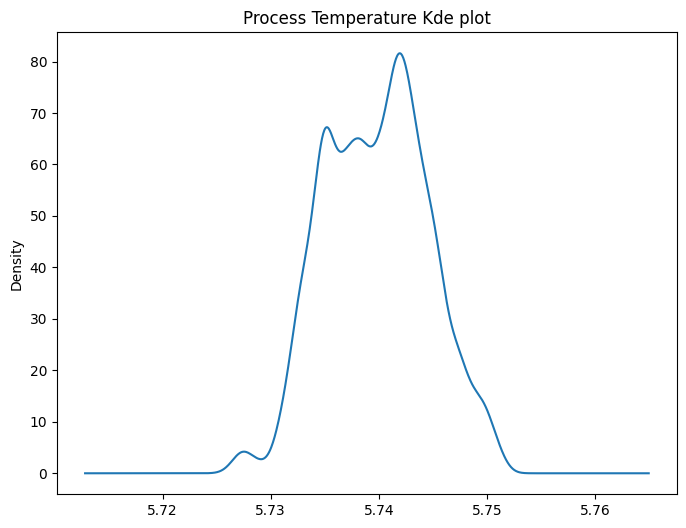

In [26]:
# Applying Log transformation

np.log1p(df['Process temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Process Temperature Kde plot"))
plt.show()

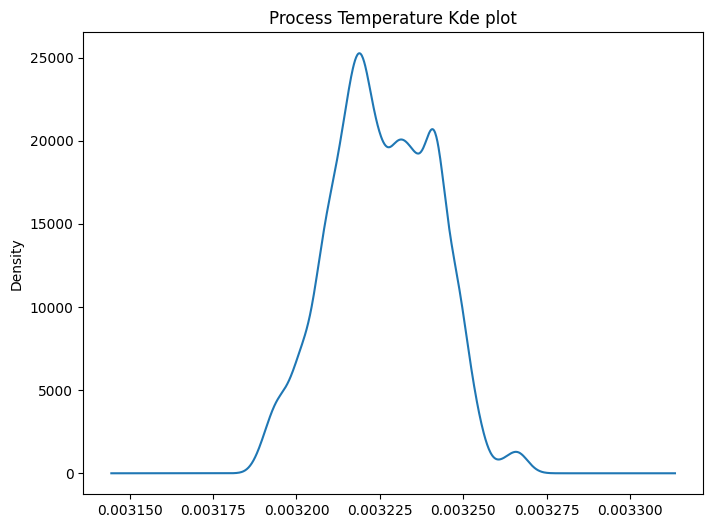

In [27]:
# Applying Reciprocal transformation

np.reciprocal(df['Process temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Process Temperature Kde plot"))
plt.show()

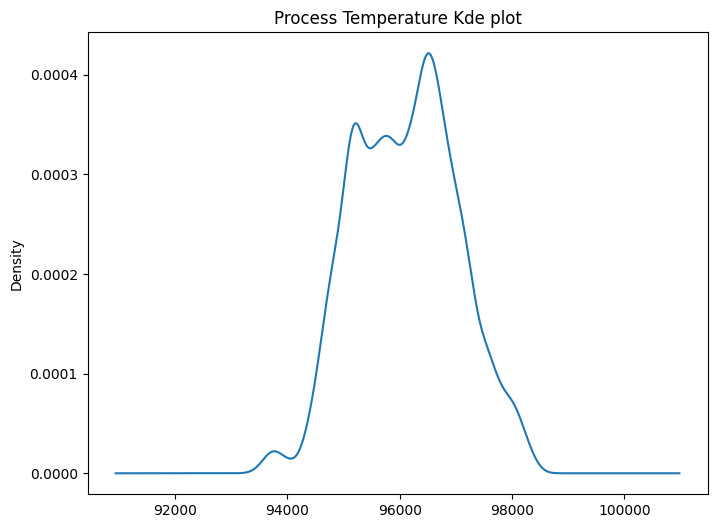

In [28]:
# Applying square root transformation

np.square(df['Process temperature [K]']).plot(kind='kde', figsize=(8,6), title=("Process Temperature Kde plot"))
plt.show()

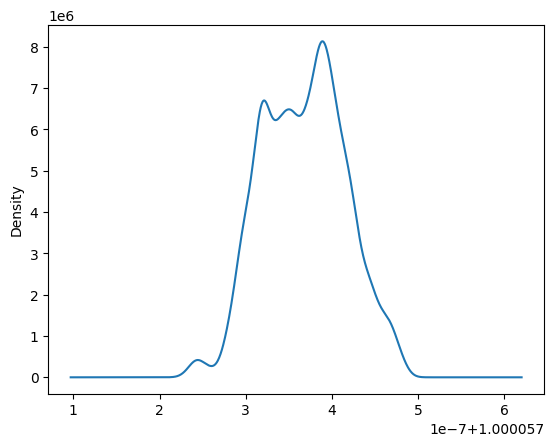

In [29]:
power = 0.00001

# apply the power transformation
transformed_data = np.power(df['Process temperature [K]'], power)
transformed_data.plot(kind='kde')
plt.show()

**Rotational speed [rpm] Column**

In [30]:
df['Rotational speed [rpm]'].value_counts()

1452    48
1435    43
1447    42
1429    40
1469    40
        ..
2197     1
2211     1
1905     1
1893     1
2450     1
Name: Rotational speed [rpm], Length: 941, dtype: int64

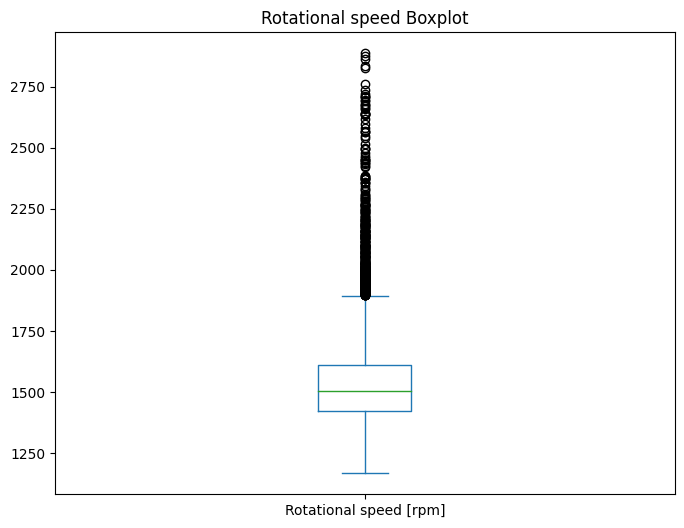

In [31]:
df['Rotational speed [rpm]'].plot(kind='box', figsize=(8,6), title=("Rotational speed Boxplot"))
plt.show()

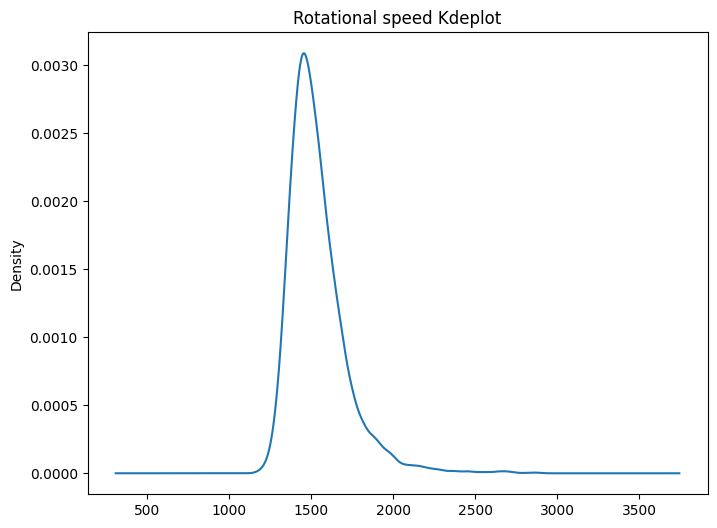

In [32]:
df['Rotational speed [rpm]'].plot(kind='kde', figsize=(8,6), title=("Rotational speed Kdeplot"))
plt.show()

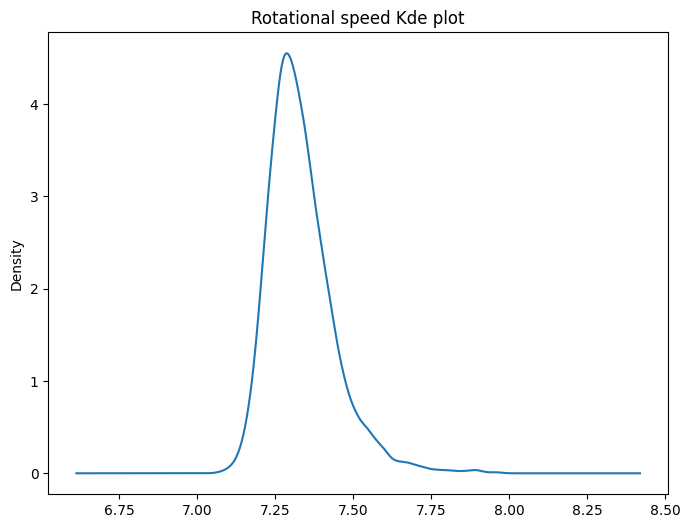

In [33]:
# Applying Log transformation

np.log1p(df['Rotational speed [rpm]']).plot(kind='kde', figsize=(8,6), title=("Rotational speed Kde plot"))
plt.show()

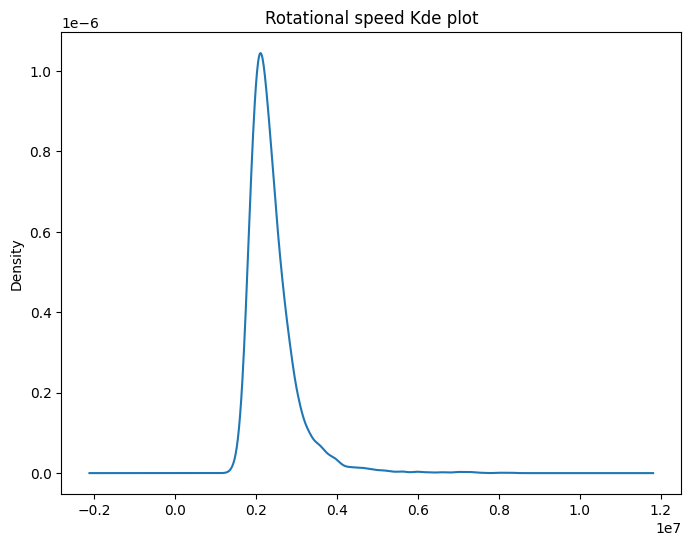

In [34]:
# Applying square root transformation

np.square(df['Rotational speed [rpm]']).plot(kind='kde', figsize=(8,6), title=("Rotational speed Kde plot"))
plt.show()

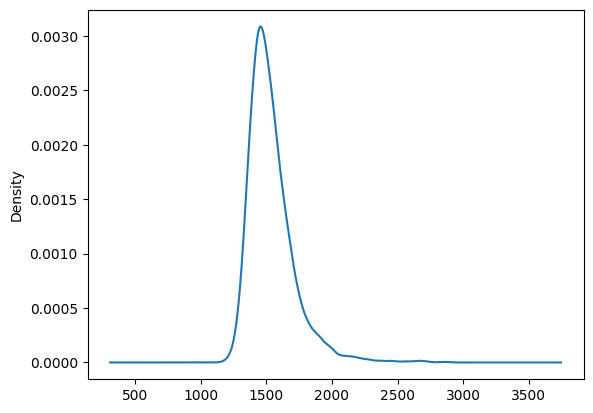

In [35]:
power = 1

# apply the power transformation
transformed_data = np.power(df['Rotational speed [rpm]'], power)
transformed_data.plot(kind='kde')
plt.show()

**Torque [Nm] Column**

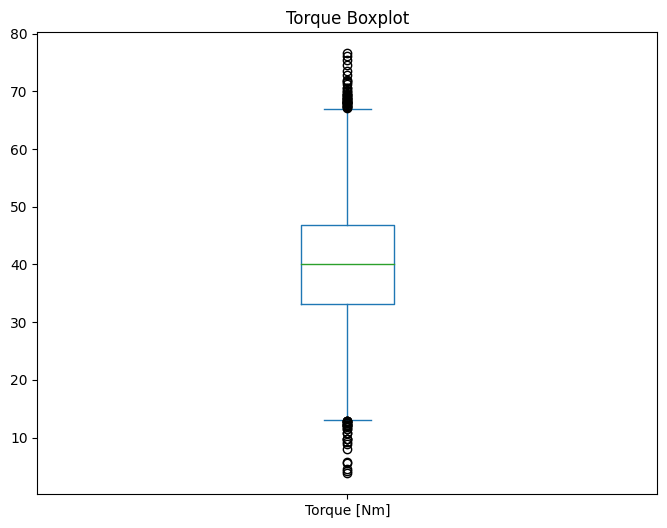

In [36]:
df['Torque [Nm]'].plot(kind='box', figsize=(8,6), title=("Torque Boxplot"))
plt.show()

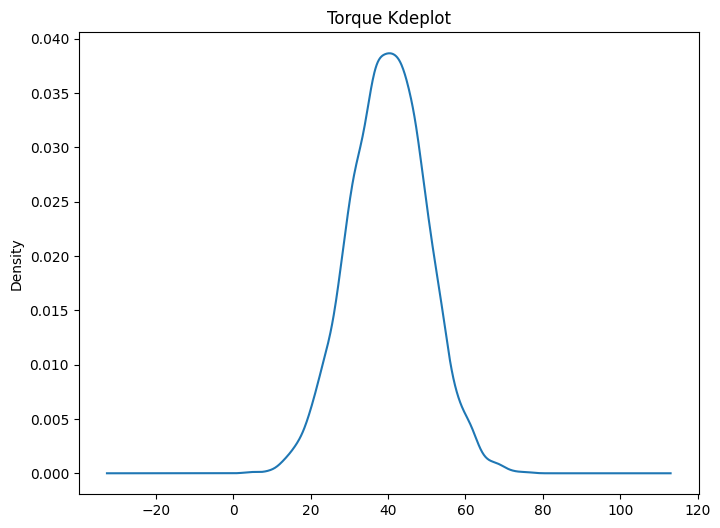

In [37]:
df['Torque [Nm]'].plot(kind='kde', figsize=(8,6), title=("Torque Kdeplot"))
plt.show()

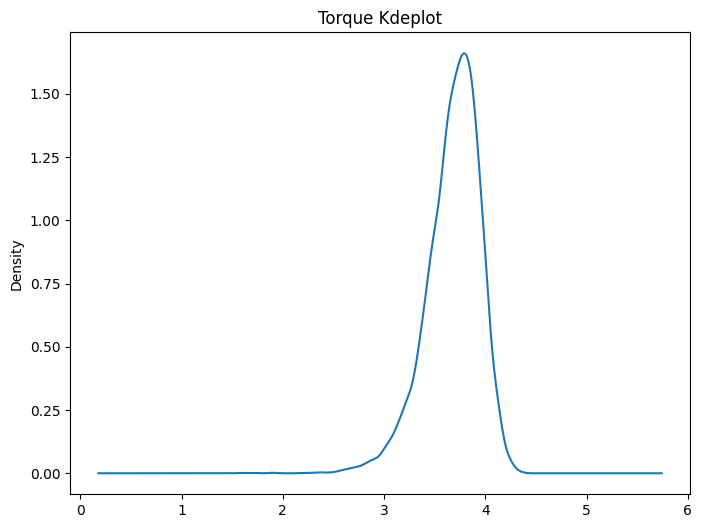

In [38]:
# Applying Log transformation

np.log1p(df['Torque [Nm]']).plot(kind='kde', figsize=(8,6), title=("Torque Kdeplot"))
plt.show()

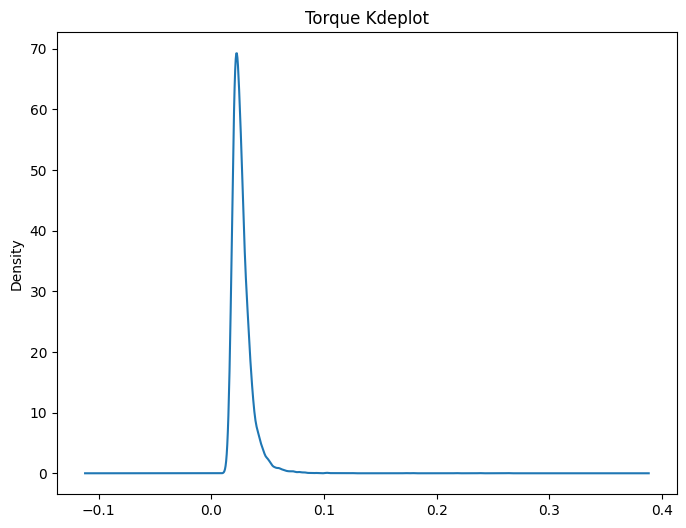

In [39]:
# Applying reciprocal transformation

np.reciprocal(df['Torque [Nm]']).plot(kind='kde', figsize=(8,6), title=("Torque Kdeplot"))
plt.show()

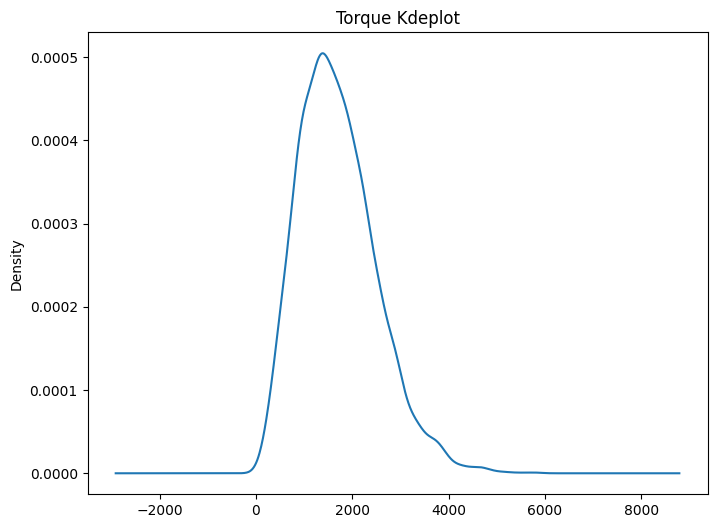

In [40]:
# Applying square root transformation

np.square(df['Torque [Nm]']).plot(kind='kde', figsize=(8,6), title=("Torque Kdeplot"))
plt.show()

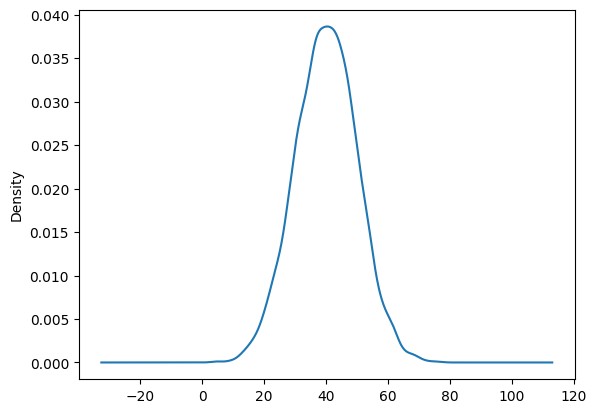

In [41]:
power = 1

# apply the power transformation
transformed_data = np.power(df['Torque [Nm]'], power)
transformed_data.plot(kind='kde')
plt.show()

**Tool wear [min] Column**

In [42]:
df['Tool wear [min]'].value_counts()

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: Tool wear [min], Length: 246, dtype: int64

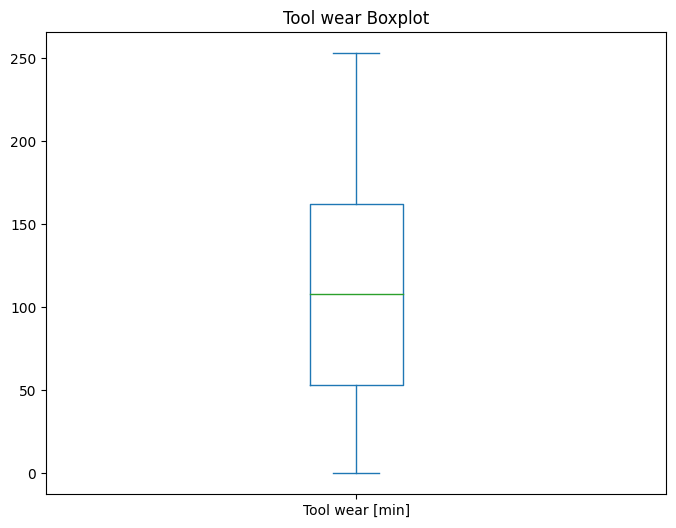

In [43]:
df['Tool wear [min]'].plot(kind='box', figsize=(8,6), title=("Tool wear Boxplot"))
plt.show()

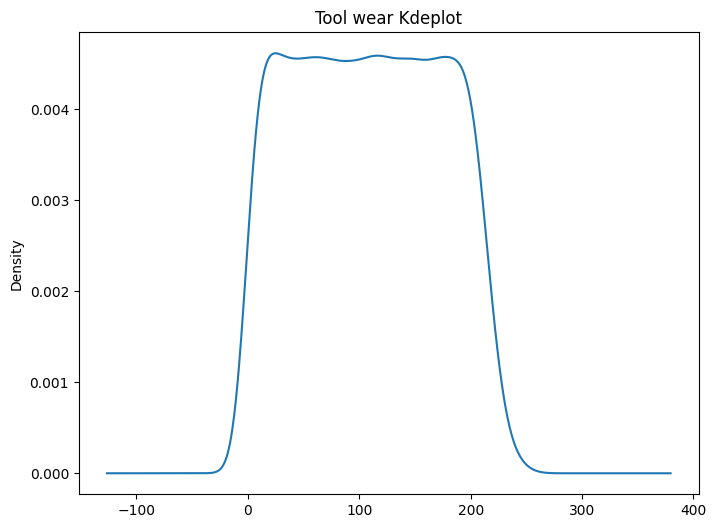

In [44]:
df['Tool wear [min]'].plot(kind='kde', figsize=(8,6), title=("Tool wear Kdeplot"))
plt.show()

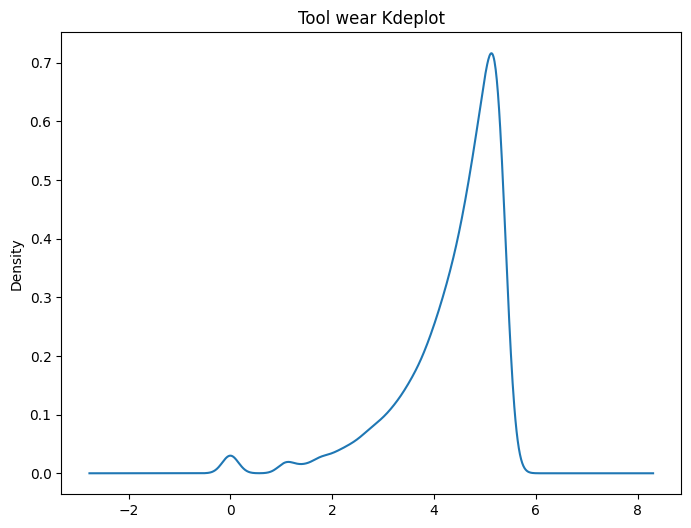

In [45]:
# Applying Log transformation

np.log1p(df['Tool wear [min]']).plot(kind='kde', figsize=(8,6), title=("Tool wear Kdeplot"))
plt.show()

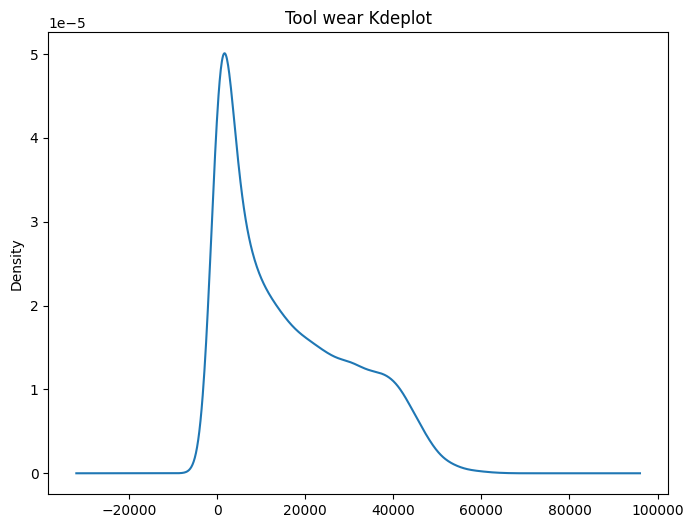

In [46]:
# Applying square transformation

np.square(df['Tool wear [min]']).plot(kind='kde', figsize=(8,6), title=("Tool wear Kdeplot"))
plt.show()

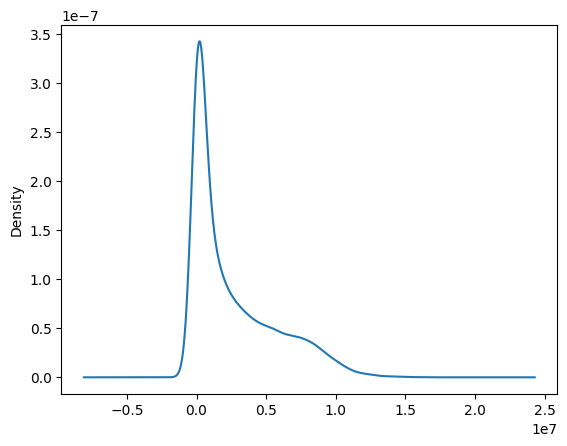

In [47]:
power = 3

# apply the power transformation
transformed_data = np.power(df['Tool wear [min]'], power)
transformed_data.plot(kind='kde')
plt.show()

**Machine failure Column**

In [48]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

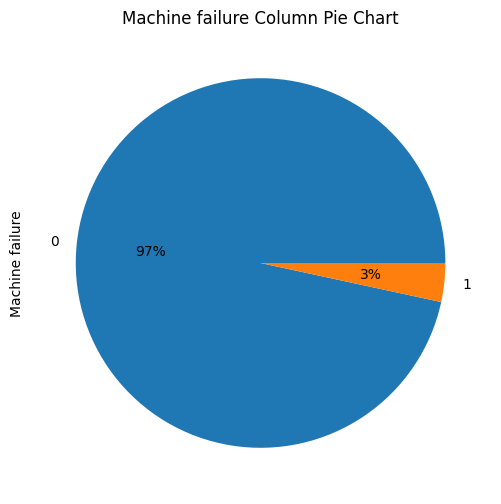

In [49]:
df['Machine failure'].value_counts().plot(kind='pie', title='Machine failure Column Pie Chart', figsize=(9,6), autopct='%1.0f%%')
plt.show()

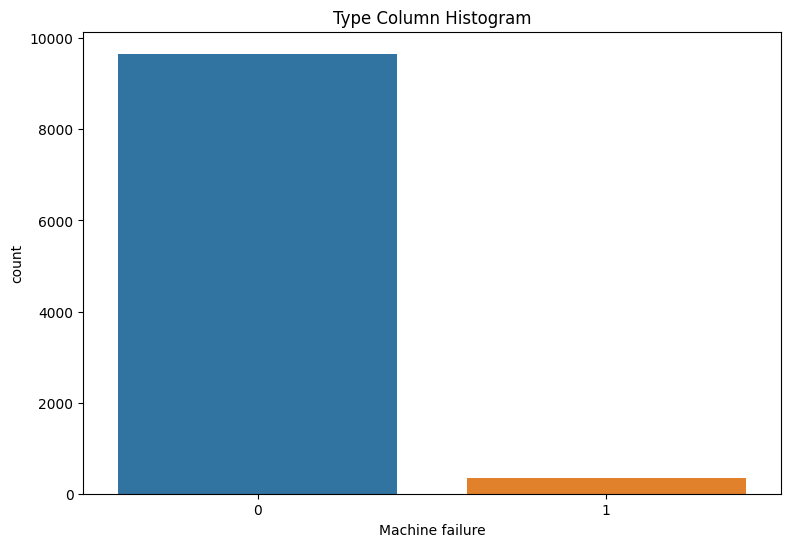

In [50]:
plt.figure(figsize=(9,6))
sns.countplot(x=df['Machine failure'])
plt.title("Type Column Histogram")
plt.show()

**TWF Columns (tool wear failure)**

In [51]:
df.TWF.value_counts()

0    9954
1      46
Name: TWF, dtype: int64

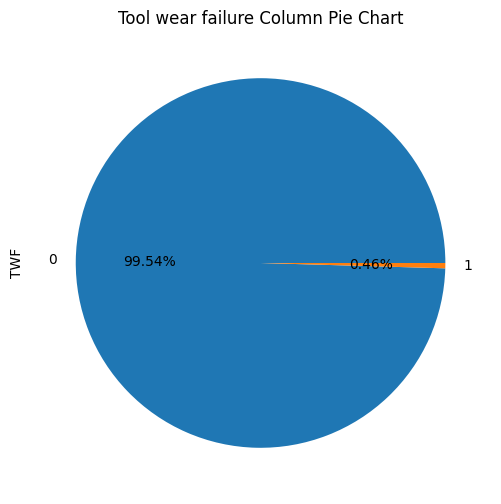

In [52]:
df.TWF.value_counts().plot(kind='pie', title='Tool wear failure Column Pie Chart', figsize=(9,6), autopct='%1.2f%%')
plt.show()

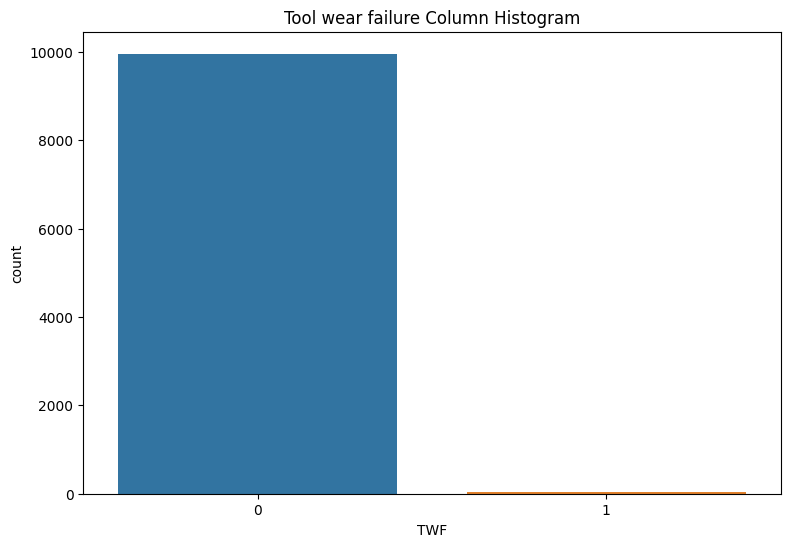

In [53]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.TWF)
plt.title("Tool wear failure Column Histogram")
plt.show()

**HDF Column (heat dissipation failure)**

In [54]:
df.HDF.value_counts()

0    9885
1     115
Name: HDF, dtype: int64

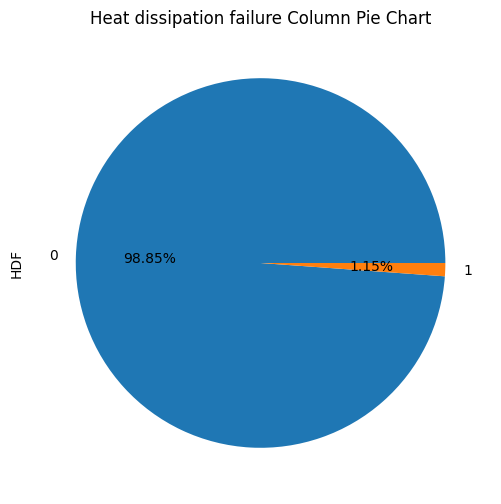

In [55]:
df.HDF.value_counts().plot(kind='pie', title='Heat dissipation failure Column Pie Chart', figsize=(9,6), autopct='%1.2f%%')
plt.show()

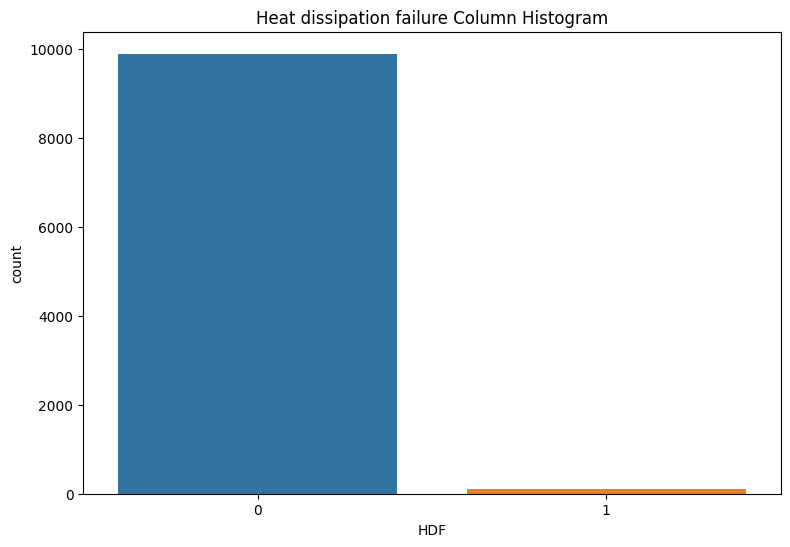

In [56]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.HDF)
plt.title("Heat dissipation failure Column Histogram")
plt.show()

**PWF Column (power failure)**

In [57]:
df.PWF.value_counts()

0    9905
1      95
Name: PWF, dtype: int64

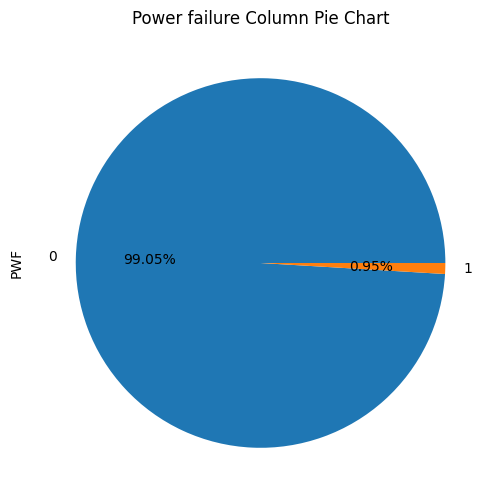

In [58]:
df.PWF.value_counts().plot(kind='pie', title='Power failure Column Pie Chart', figsize=(9,6), autopct='%1.2f%%')
plt.show()

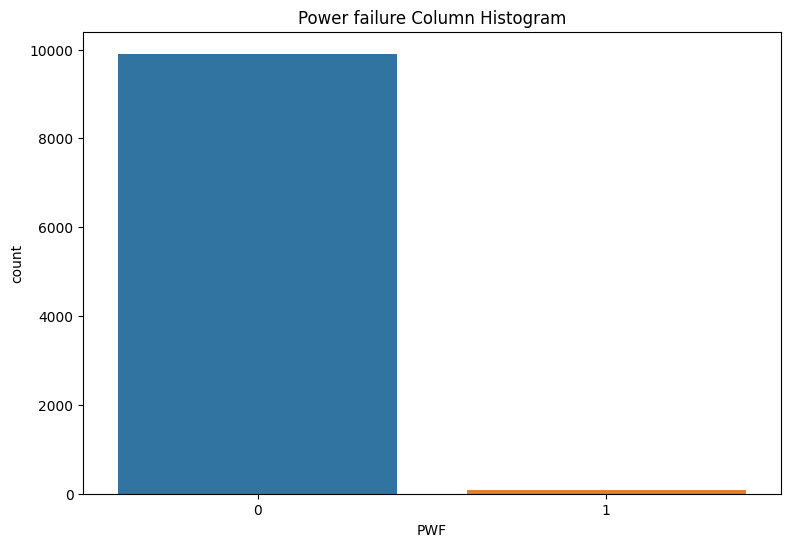

In [59]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.PWF)
plt.title("Power failure Column Histogram")
plt.show()

**OSF Column (overstrain failure)**

In [60]:
df.OSF.value_counts()

0    9902
1      98
Name: OSF, dtype: int64

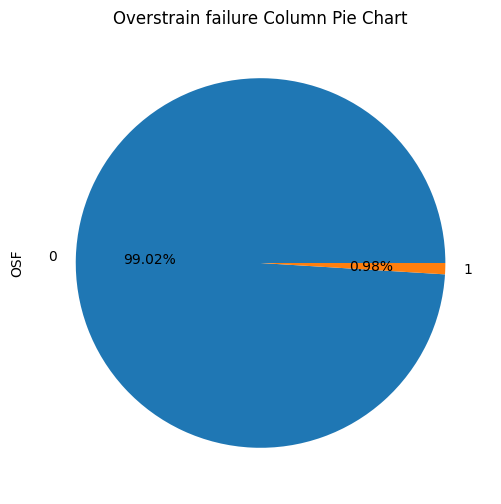

In [61]:
df.OSF.value_counts().plot(kind='pie', title='Overstrain failure Column Pie Chart', figsize=(9,6), autopct='%1.2f%%')
plt.show()

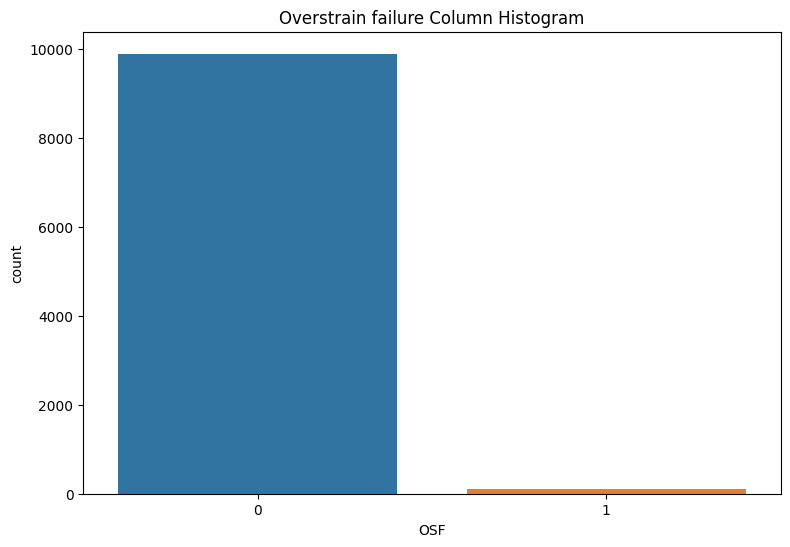

In [62]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.OSF)
plt.title("Overstrain failure Column Histogram")
plt.show()

**RNF Column (Random failures)**

In [63]:
df.RNF.value_counts()

0    9981
1      19
Name: RNF, dtype: int64

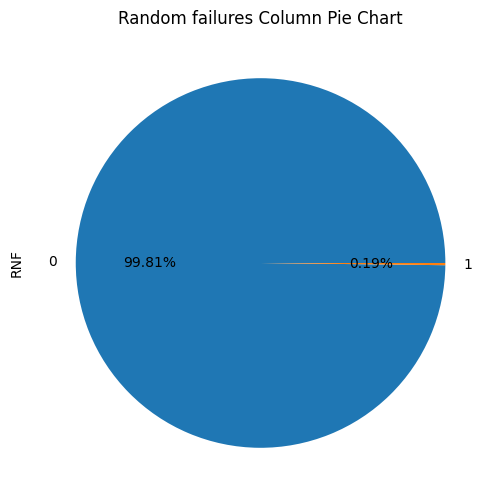

In [64]:
df.RNF.value_counts().plot(kind='pie', title='Random failures Column Pie Chart', figsize=(9,6), autopct='%1.2f%%')
plt.show()

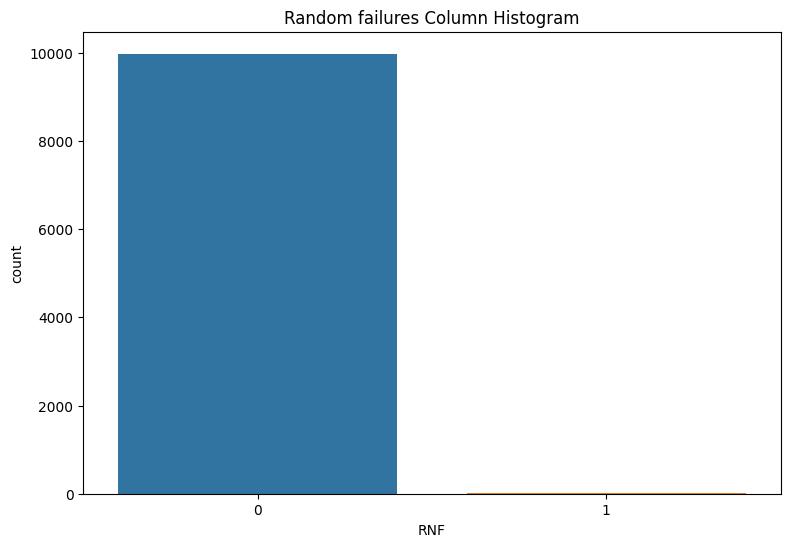

In [65]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.RNF)
plt.title("Random failures Column Histogram")
plt.show()

### Splitting Data into X and Y

In [70]:
X = df.iloc[:,:-6]

In [71]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9


In [68]:
# Select the columns to merge
selected_columns = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a new column 'Merged' based on the condition
y = df[selected_columns].any(axis=1).astype(int)

# Display the DataFrame with the merged column
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64


In [69]:
y.value_counts()

0    9643
1     357
dtype: int64

# Model Building

Model Building, Model Evaluating and Model Saving by my own library **MLFAST** for time saving

In [72]:
 !pip install mlfast==0.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from mlfast import Classification

**Logistic Regression**

In [74]:
Classification(X, y, scaler='standard', model='lr', cat=True)

Accuracy Score :0.9645,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1915
           1       0.89      0.19      0.31        85

    accuracy                           0.96      2000
   macro avg       0.93      0.59      0.65      2000
weighted avg       0.96      0.96      0.95      2000
 
 
 Model saved successfully in model/lr.pkl


**Random Forest Classifier**

In [76]:
Classification(X, y, scaler='robust', model='rf', cat=True)

Accuracy Score :0.976,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1915
           1       0.93      0.47      0.62        85

    accuracy                           0.98      2000
   macro avg       0.95      0.73      0.81      2000
weighted avg       0.98      0.98      0.97      2000
 
 
 Model saved successfully in model/rf.pkl


**Decision Tree Classifier**

In [77]:
Classification(X, y, scaler='robust', model='dt', cat=True)

Accuracy Score :0.9715,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1915
           1       0.74      0.51      0.60        85

    accuracy                           0.97      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.97      0.97      0.97      2000
 
 
 Model saved successfully in model/dt.pkl


**Support Vector Machine Classifier**

In [78]:
Classification(X, y, scaler='robust', model='svm', cat=True)

Accuracy Score :0.965,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1915
           1       0.86      0.21      0.34        85

    accuracy                           0.96      2000
   macro avg       0.91      0.61      0.66      2000
weighted avg       0.96      0.96      0.95      2000
 
 
 Model saved successfully in model/svm.pkl


**KNeighbors Classifier**

In [79]:
Classification(X, y, scaler='robust', model='knn', cat=True)

Accuracy Score :0.9655,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1915
           1       0.79      0.26      0.39        85

    accuracy                           0.97      2000
   macro avg       0.88      0.63      0.69      2000
weighted avg       0.96      0.97      0.96      2000
 
 
 Model saved successfully in model/knn.pkl


**Gradient Boosting Classifier**

In [80]:
Classification(X, y, scaler='robust', model='gb', cat=True)

Accuracy Score :0.9785,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1915
           1       0.94      0.53      0.68        85

    accuracy                           0.98      2000
   macro avg       0.96      0.76      0.83      2000
weighted avg       0.98      0.98      0.98      2000
 
 
 Model saved successfully in model/gb.pkl


**AdaBoost Classifier**

In [81]:
Classification(X, y, scaler='robust', model='ada', cat=True)

Accuracy Score :0.9705,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1915
           1       0.82      0.39      0.53        85

    accuracy                           0.97      2000
   macro avg       0.90      0.69      0.76      2000
weighted avg       0.97      0.97      0.97      2000
 
 
 Model saved successfully in model/ada.pkl


**XGBoost Classifier**

In [82]:
Classification(X, y, scaler='robust', model='xbg', cat=True)

Accuracy Score :0.9795,     
 
 Classification Report  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1915
           1       0.96      0.54      0.69        85

    accuracy                           0.98      2000
   macro avg       0.97      0.77      0.84      2000
weighted avg       0.98      0.98      0.98      2000
 
 
 Model saved successfully in model/xbg.pkl


**Taking Random Forest Model for Productionization because it give fast and better accuracy in the other hand Xgboost taking some extra time**

# Improvement

- Required Feature Engineering to handle outlier and add or merge feature
- Hyperparameter tuning
- MLFLOW for Experimenting and Model Tracking
- Documentation for all process in detailed way